In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Dense,Flatten,Conv2D,Dropout,GlobalMaxPool2D
from tensorflow.keras.models import Model

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [0]:
x_train , x_test = x_train/255 , x_test/255

In [21]:
x_train.shape

(50000, 32, 32, 3)

In [22]:
y_train.shape #tf expects an array of shape N... not N by N

(50000, 1)

In [0]:
y_test,y_train = y_test.flatten(),y_train.flatten() 

In [10]:
y_train.shape # FIxed

(50000,)

In [12]:
K = len(set(y_train))
print("The number of classes",K)

The number of classes 10


In [0]:
i = Input(shape =x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

In [0]:
model = Model(i,x)

In [26]:
model.compile(optimizer='adam',loss = "sparse_categorical_crossentropy",metrics = ['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5133 - accuracy: 0.4486 - val_loss: 1.2523 - val_accuracy: 0.5500
Epoch 2/15
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1696 - accuracy: 0.5817 - val_loss: 1.0624 - val_accuracy: 0.6174
Epoch 3/15
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0098 - accuracy: 0.6416 - val_loss: 0.9873 - val_accuracy: 0.6477
Epoch 4/15
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8941 - accuracy: 0.6837 - val_loss: 0.9196 - val_accuracy: 0.6777
Epoch 5/15
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7907 - accuracy: 0.7207 - val_loss: 0.9162 - val_accuracy: 0.6860
Epoch 6/15
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7037 - accuracy: 0.7504 - val_loss: 0.9153 - val_accuracy: 0.6776
Epoch 7/15
1563/1563 [==============================] - 43s 28ms/step - loss: 0.6225 - accuracy: 0.7785 - val_loss: 0.9364 -

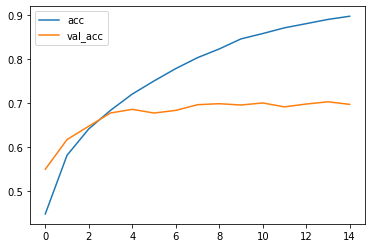

In [28]:
plt.plot(r.history['accuracy'],label = 'acc')
plt.plot(r.history['val_accuracy'],label = 'val_acc')
plt.legend()

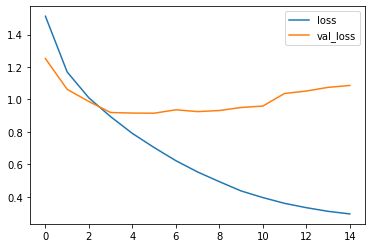

In [32]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

Confusion matrix, without normalization
[[747  18  46  31  20   7   5  10  96  20]
 [ 15 834  11  12   1   9  11   2  30  75]
 [ 70   9 589  58 100  75  45  31  19   4]
 [ 24   7  66 517  68 206  51  25  13  23]
 [ 19   3  92  73 651  47  40  62  12   1]
 [  9   9  51 193  58 605  24  41   7   3]
 [  8  10  51  73  57  44 733   6  11   7]
 [ 19   4  29  48  64  67  12 739   4  14]
 [ 44  34  18  26   8   8   4   3 842  13]
 [ 50 114  10  25   3  14   9  12  47 716]]


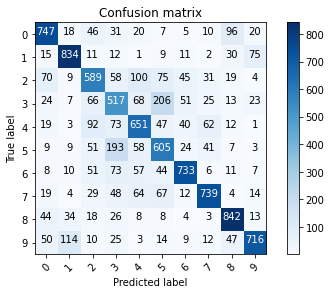

In [33]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.


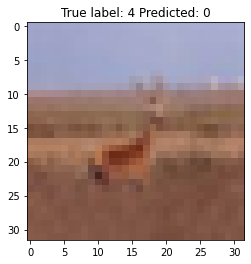

In [39]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
